## Libraries Used
 - numpy
 - matplotlib
 - seaborn
 - pandas
 - scikit

In [1]:
# Data Handling using pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\RAMSHID NK\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Feature selection
from sklearn.feature_selection import mutual_info_classif

In [5]:
# Classifier for classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier


In [6]:
# Performance Matrix
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [7]:
dataframe=pd.read_csv("cancer_gene_expression.csv")


In [8]:
dataframe

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [9]:
#checking missing values
datanul=dataframe.isnull().sum()
k=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(k))

columns with missing values:0


<AxesSubplot:ylabel='Cancer_Type'>

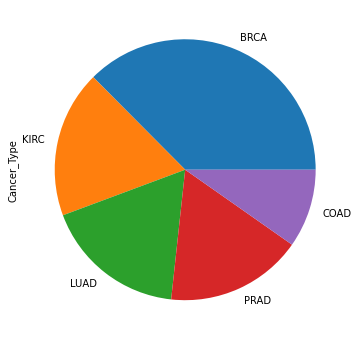

In [10]:
#plot a bar chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot(kind='pie', figsize =(11,6))

## *Data preprocesing for put data in appropriate format before modelling*

In [11]:
# seperate the feature values from class
# sklearn require that features and class are separated before parsing them to the classifiers.
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [12]:
X.shape

(801, 8000)

In [13]:
y.shape

(801,)

In [14]:
dataframe.shape

(801, 8001)

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [15]:
#Encode target labels (y) with values between 0 and n_classes-1.
#Encoding will be done using the LabelEncoder
label_en =LabelEncoder()
label_en.fit(y)
y_encoded = label_en.transform(y)
label = label_en.classes_
classes = np.unique(y_encoded)

In [16]:
label

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [17]:
classes

array([0, 1, 2, 3, 4])

The above labels are mapped to the classes

\
**Data Splitting**\
We will now partition the data into training and testing sets. The training data will be preprocessed and fed into the machine learning model. During this training phase, the model will learn to recognize underlying patterns within the data that will enable it to make accurate predictions on future unseen data. The testing set, completely independent of the training data, will then be used to rigorously evaluate the model's generalizability and performance.




In [18]:
X_train, X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [19]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


\
**Data Normalization**\
Looking the above results . we could find out that they are in diffrent ranges , need to normalize
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias

In [20]:
# Scale data between 0 and 1
min_max_scal = MinMaxScaler()
X_train_norm = min_max_scal.fit_transform(X_train)
X_test_norm =min_max_scal.fit_transform(X_test)

In [21]:
X_train.iloc[0,3]

2.18164326123

In [22]:
X_train_norm[0,3] #this is numpy array

0.4671305057022768

## **Feature Selection**

Feature selection is a critical pre-processing step employed to identify and retain the most relevant features for the classification task. This process aims to reduce the dimensionality of the data while preserving its informative content. In this instance, the mutual information algorithm is leveraged to quantify the degree of association between each feature and the target variable. Subsequently, the top n features (e.g., 300) exhibiting the strongest relationships are chosen for further machine learning analysis.




In [23]:
MI = mutual_info_classif(X_train_norm,y_train)

In [24]:
MI.shape

(8000,)

In [25]:
MI[0:5]

array([0.        , 0.04955634, 0.00327506, 0.05019165, 0.        ])

In [26]:
# Select the top 300 features
n_feature = 300
select_score_indices =np.argsort(MI)[::-1][0:n_feature]

In [27]:
X_train_selected = X_train_norm[:,select_score_indices]
X_test_selected = X_test_norm[:,select_score_indices]


In [28]:
X_train_selected.shape


(640, 300)

In [29]:
X_test_selected.shape

(161, 300)

## Classification

Our machine learning approach leverages a random forest classifier, a well-suited algorithm for handling the project's inherently high-dimensional and multiclass data. This ensemble learning method trains a multitude of decision trees, each analyzing a random subset of features. The final classification is determined by aggregating the predictions from these individual trees, leading to a robust and accurate model

### Model Training

The training process empowers a machine learning model to extract knowledge from data. This acquired knowledge allows the model to generate predictions for unseen data by identifying and leveraging underlying patterns. During this critical phase, the model is exposed to a designated training subset. For the purposes of this tutorial, we will employ the Random Forest Classifier algorithm.

In [31]:
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

### Model Evaluation

After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model
- accuracy
- precision
- recall
- f1 score
- confusion matrix
- ROC Curve


In [32]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

accuracy:0.9550


In [33]:
#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

precision:0.9695


In [34]:
#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)


recall:0.9689


In [35]:
#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)

f1score:0.9687


In [37]:
report=classification_report(y_test,y_pred, target_names=label)
print('\n')
print('classification report\n\n')
print(report)



classification report


              precision    recall  f1-score   support

        BRCA       0.95      0.98      0.97        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.92      0.92        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.97       161
   macro avg       0.97      0.96      0.96       161
weighted avg       0.97      0.97      0.97       161



In [41]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=label,columns=label)

In [42]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,1,14,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


Text(33.0, 0.5, 'True Labels')

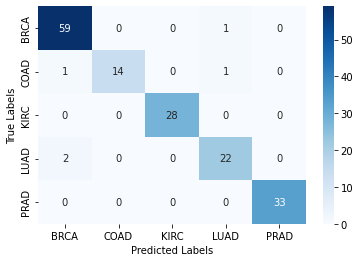

In [43]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

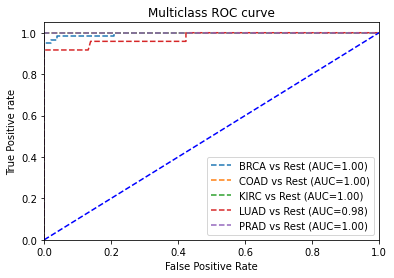

In [50]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()    